<a href="https://colab.research.google.com/github/Ayanak2004/CyberLabs-WOC_5.0-Machine_Learning/blob/Code/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
''' This code block is to be executed always to upload the files '''

from google.colab import files
uploaded = files.upload() # upload the required csv files

# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

def normalize(X):
  # function to z_score_normalize the input features
  mu = np.mean(X , axis = 0)
  sigma = np.std(X , axis = 0)
  X_norm = (X - mu) / sigma
  return(X_norm)

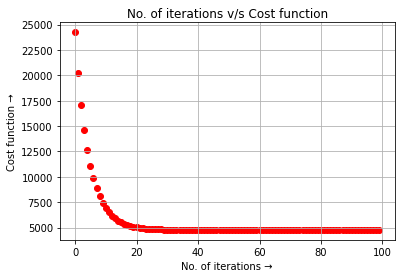

<Figure size 432x288 with 0 Axes>

In [ ]:
''' Regression code block to be executed for linear and polynomial regression '''

class Regression:

  '''
  cost_function : takes the training data, weights and bias as input and calculates the corresponding cost
  gradient_descent : function takes the training data as input and optimizes the weights and bias to predict unknown data accurately
                     also, it plots the decrease in cost function with increasing iterations
  X : input features
  y : target variable
  w : weights
  b : bias
  dj_dw : derivative of cost function with respect to weights
  dj_db : derivative of cost function with respect to bias
  '''

  def __init__(self,alpha,iterations):
    self.alpha = alpha
    self.iterations = iterations
  
  def cost_function(self,X,y,w,b):
    m , n = X.shape
    cost_T = np.zeros(m , dtype = float)
    cost_T = (np.dot(w , X.T).T + b - y)**2
    cost = np.sum(cost_T)
    cost /= 2*m
    return cost
  
  def gradient_descent(self,X,y):
    m , n = X.shape
    w = np.ones([1 , n])
    b = 1
    cost = np.zeros(self.iterations , dtype = float)
    for i in range(self.iterations): 
      dj_dw = np.zeros(n , dtype = float)
      dj_db_T = np.zeros(m , dtype = float)
      dj_dw = np.dot((np.dot(w , X.T).T + b - y).T , X) / m
      dj_db_T = (np.dot(w , X.T).T + b - y) / m
      dj_db = np.sum(dj_db_T)
      w -= self.alpha * dj_dw
      b -= self.alpha * dj_db
      cost[i] = self.cost_function(X,y,w,b)
    iter = np.arange(self.iterations)
    plt.grid(True)
    plt.scatter(iter , cost , c='r')
    plt.xlabel('No. of iterations →')
    plt.ylabel('Cost function →')
    plt.title('No. of iterations v/s Cost function')
    plt.show()
    plt.clf()
    return w,b

train_data = pd.read_csv(io.BytesIO(uploaded['linear_train.csv']))
train_data = train_data.to_numpy()
m1 , n1 = train_data.shape
X = train_data[0:m1,1:n1-1]
y = train_data[0:m1,n1-1:n1]
predict = pd.read_csv(io.BytesIO(uploaded['linear_test_data.csv']))
predict = predict.to_numpy()
m2 , n2 = predict.shape
id = predict[0:m2,0:1]
id = id.flatten()
x_pred = predict[0:m2,1:n2]
X_in = np.concatenate([X,x_pred])
X_in = normalize(X_in)
X = X_in[0:m1]
x_pred = X_in[m1:m1+m2]
lr = Regression(alpha=0.1,iterations=100)
w , b = lr.gradient_descent(X,y)
y_pred = np.dot(w,x_pred.T).T + b
y_pred = y_pred.flatten()
data = {"ids":id , "Predicted Value":y_pred}
df = pd.DataFrame(data)
df.to_csv("linear_test_predicted.csv",index=False)

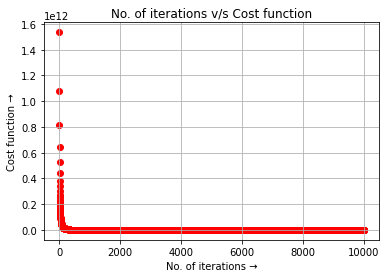

<Figure size 432x288 with 0 Axes>

In [ ]:
'''
Polynomial Regression uses the same Regression class as used in Linear Regression because 
the training of dataset is done in the same way but just with multiplied features
'''

train_data = pd.read_csv(io.BytesIO(uploaded['polynomial_train.csv']))
train_data = train_data.to_numpy()
m1 , n1 = train_data.shape
X = train_data[0:m1,1:n1-1]
y = train_data[0:m1,n1-1:n1]
predict = pd.read_csv(io.BytesIO(uploaded['polynomial_test_data.csv']))
predict = predict.to_numpy()
m2 , n2 = predict.shape
id = predict[0:m2,0:1]
id = id.flatten()
x_pred = predict[0:m2,1:n2]
X_in = np.concatenate([X,x_pred])
var = np.zeros([n2-1,m1+m2,1] , dtype=float) # var is generated with the known information that the training data has 3 features
for i in range(n2-1):
  var[i] = X_in[0:m1+m2,i:i+1]
degree = 5 # hyperparameter generating the least cost function
X_in = np.c_[np.zeros([m1+m2,1] , dtype=float)]
'''
Now with the information that the training data has 3 features, we run 3 loops to
put the polynomial combination of the 3 features upto the chosen degree in the variable X_in
'''
for i in range(degree + 1):
  for j in range(degree + 1):
    for k in range(degree + 1):
      if((i + j + k) <= degree):
        X_in = np.c_[X_in , (var[0]**i) * (var[1]**j) * (var[2]**k)]
X_in = X_in[:,2:]
X_in = normalize(X_in)
X = X_in[0:m1]
x_pred = X_in[m1:m1+m2]
lr = Regression(alpha=0.1,iterations=10000)
w , b = lr.gradient_descent(X,y)
y_pred = np.dot(w,x_pred.T).T + b
y_pred = y_pred.flatten()
data = {"ids":id , "Predicted Value":y_pred}
df = pd.DataFrame(data)
df.to_csv("polynomial_test_predicted.csv",index=False)

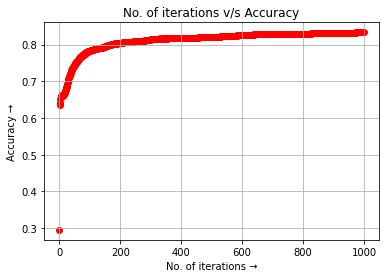

Accuracy:  83.38 %


<Figure size 432x288 with 0 Axes>

In [ ]:
import math

def softmax(z):
  # subtracting the maximum value from each term serves for the purpose of normalization
  e = np.exp(z - np.max(z , axis=1 , keepdims=True))
  return e / np.sum(e , axis=1 , keepdims=True)


class Classification:

  '''
  one_hot_encoder : function to hot-encode the multiclass target variable into a 2-D array of 0s and 1s
  gradient_descent : optimize weights to get minimum cost and plot accuracy v/s iteration
  y_new : hot_encoded target variable
  acc : variable to store accuracy after each iteration
  y_pred : final predicted variable based on the position where maximum probability value occurs
  '''

  def __init__(self,alpha,iterations):
    self.alpha = alpha
    self.iterations = iterations

  def one_hot_encoder(self,y):
    map = {}
    y = y.flatten()
    for id,num in enumerate(np.unique(y)):
      map[num] = id
    y_new = np.zeros([y.shape[0],len(np.unique(y))],dtype=int)
    for i,j in enumerate(y):
      y_new[i,map[j]] = 1
    return y_new
  
  def gradient_descent(self,X,y,X_1):
    y_new = self.one_hot_encoder(y)
    y_new = y_new[0:X.shape[0]]
    w = np.ones((X.shape[1],len(np.unique(y))))
    acc = np.zeros(self.iterations)
    y = y.flatten()
    y = y[X.shape[0]:X.shape[0]+X_1.shape[0]]
    test_acc = np.zeros(y.shape[0],dtype=int)
    for i in range(self.iterations):
      dj_dw = X.T.dot(softmax(X.dot(w))-y_new)
      dj_dw /= X.shape[0]
      w -= self.alpha * dj_dw
      y_pred = np.argmax(softmax(X_1.dot(w)) , axis=1)
      test_acc = y_pred - y
      acc[i] = (y.shape[0] - np.count_nonzero(test_acc)) / y.shape[0]
    iter = np.arange(self.iterations)
    plt.grid(True)
    plt.scatter(iter , acc , c='r')
    plt.xlabel('No. of iterations →')
    plt.ylabel('Accuracy →')
    plt.title('No. of iterations v/s Accuracy')
    plt.show()
    plt.clf()
    print("Accuracy: ",round(acc[self.iterations-1] * 100 , 2),"%")
    return w


train_data = pd.read_csv(io.BytesIO(uploaded['classification_train.csv']))
train_data = train_data.to_numpy()
m1 , n1 = train_data.shape
X = train_data[0:m1,2:n1]
y = train_data[0:m1,1:2]
predict = pd.read_csv(io.BytesIO(uploaded['classification_test.csv']))
predict = predict.to_numpy()
m2 , n2 = predict.shape
id = predict[0:m2,0:1]
id = id.flatten()
x_pred = predict[0:m2,1:n2]
X = np.insert(X,0,1,axis=1) # adding '1' here basically acts as the bias term 
x_pred = np.insert(x_pred,0,1,axis=1)
# train test split with ratio 8:2
X_train = X[0:int(m1*0.8)]
X_test = X[int(m1*0.8):m1]
cls = Classification(alpha=2e-6,iterations=1000)
w = cls.gradient_descent(X_train,y,X_test)
y_pred = np.argmax(softmax(x_pred.dot(w)) , axis=1)
data = {"ids":id , "Predicted Value":y_pred}
df = pd.DataFrame(data)
df.to_csv("classification_test_predicted.csv",index=False)

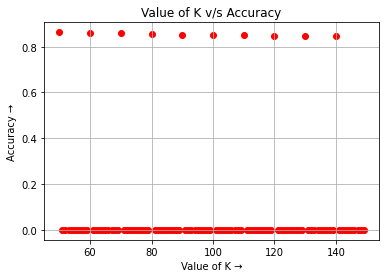

Max Accuracy:  86.3 %
Corresponding Value of K:  50


<Figure size 432x288 with 0 Axes>

In [ ]:
class KNN:
   '''
   mode : calculates the mode(data point with highest occurrence) of the input data
   euclidean_distance : calculates the euclidean distance between a point and a set of points
   knn : calculates the nearest k points from any point
   dist_in : variable to store euclidean distance for every point
   k_nearest_labels : target values for the k nearest neighbours
   k_values : stores the mode of k_nearest_labels
   '''

  def __init__(self,k):
    self.k = k
  
  def mode(self,labels):
    num , count = np.unique(labels,return_counts=True)
    return num[np.argmax(count)]
  
  def euclidean_distance(self,p1,p2): 
    dist = p1 - p2
    dist *= dist
    dist = np.sum(dist,axis=1)
    dist = dist**0.5
    return dist
  
  def knn(self,X,x_pred,y):
    dist_ind = np.zeros([x_pred.shape[0] , X.shape[0]] , dtype=float)
    for i,j in enumerate(x_pred):
      dist_ind[i] = self.euclidean_distance(j,X)
    k_values = []
    for i in dist_ind:
      sort_dist_ind = []
      for index,j in enumerate(i):
        sort_dist_ind.append((j,index))
      sort_dist_ind = sorted(sort_dist_ind)[:self.k]
      k_nearest_labels = [y[k][0] for distance,k in sort_dist_ind]
      k_values.append(self.mode(k_nearest_labels))
    return k_values


train_data = pd.read_csv(io.BytesIO(uploaded['classification_train.csv']))
train_data = train_data.to_numpy()
m1 , n1 = train_data.shape
X = train_data[0:m1,2:n1]
y = train_data[0:m1,1:2]
predict = pd.read_csv(io.BytesIO(uploaded['classification_test.csv']))
predict = predict.to_numpy()
m2 , n2 = predict.shape
id = predict[0:m2,0:1]
id = id.flatten()
x_pred = predict[0:m2,1:n2]
# verification done with data predicted by logistic regression model
verify_data = pd.read_csv(io.BytesIO(uploaded['classification_test_predicted.csv']))
verify_data = verify_data.to_numpy()
m3 , n3 = verify_data.shape
y_test = verify_data[int(m3*0.6):m3,1:2]
y_test = y_test.flatten()
test_acc = np.zeros(y_test.shape[0],dtype=int)
# 10 values of K compared to get the most optimised prediction for maximum accuracy
size = 100
start = 50
acc = np.zeros(size)
for k in range(start,start+size,10):
  knn_cls = KNN(k)
  y_pred = knn_cls.knn(X,x_pred,y)
  test_acc = y_pred[int(m3*0.6):m3] - y_test
  acc[k-start] = (y_test.shape[0] - np.count_nonzero(test_acc)) / y_test.shape[0]
iter = np.arange(start,start+size)
plt.grid(True)
plt.scatter(iter , acc , c='r')
plt.xlabel('Value of K →')
plt.ylabel('Accuracy →')
plt.title('Value of K v/s Accuracy')
plt.show()
plt.clf()
print("Max Accuracy: ",round(acc[np.argmax(acc)]*100,2),"%")
print("Corresponding Value of K: ",np.argmax(acc)+start)
knn_cls = KNN(np.argmax(acc)+start)
y_pred = knn_cls.knn(X,x_pred,y)
data={"ids":id , "Predicted Value":y_pred}
df=pd.DataFrame(data)
df.to_csv("KNN_test_predicted.csv",index=False)

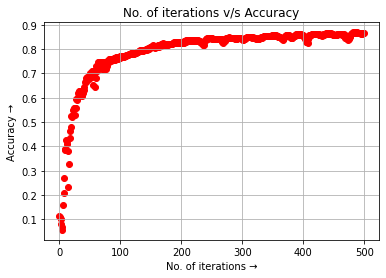

Accuracy:  86.53 %


<Figure size 432x288 with 0 Axes>

In [ ]:
class Neural_Network:

  '''
  parameters : initialises W and b with He Normal initialization
  sigmoid , relu : computes sigmoid and relu function of the input variable
  d_sigmoid , d_relu : computes derivative of sigmoid and relu functions
  forward_prop : forward propagation that computes value of Z and A in each layer and stores them in cache
  linear_back : calculates derivative of A , W , b of each layer
  backword_prop : changes the value of gradients with each iteration in all layers
  n_layer_model : updates the parameters with forward and backward propagation and also computes accuracy
  predict : predicts the target value for some given input
  linear_cache : stores the value of A and parameters for all layers
  activation_cache : stores the value of Z for all layers
  '''

  def __init__(self,layer_dims,alpha,iterations):
    self.alpha = alpha
    self.iterations = iterations
    self.layer_dims = layer_dims
    
  def parameters(self):
    param = {}
    L = len(self.layer_dims)
    for i in range(1,L):
      param['W'+str(i)] = np.random.randn(layer_dims[i],layer_dims[i-1]) * np.sqrt(2/(layer_dims[i-1]+layer_dims[i]))
      param['b'+str(i)] = np.zeros((layer_dims[i],1))
    return param
  
  def sigmoid(self,z):
    return 1 / (1 + np.exp(-z)) , z
  def relu(self,z):
    return z * (z>0) , z
  def d_sigmoid(self,z):
    x , y = self.sigmoid(z)
    return x * (1-x)
  def d_relu(self,z):
    x , y = self.relu(z)
    return 1.0 * (x>0)

  def forward_prop(self,X,param):
    caches = []
    A = X
    L = len(param) // 2
    for i in range(1,L):
      A_prev = A
      Z = np.dot(param['W'+str(i)],A_prev)+param['b'+str(i)]
      linear_cache = (A_prev , param['W'+str(i)] , param['b'+str(i)])
      A , activation_cache = self.relu(Z)
      cache = (linear_cache,activation_cache)
      caches.append(cache)
    Z = np.dot(param['W'+str(L)],A) + param['b'+str(L)]
    linear_cache = (A , param['W'+str(L)] , param['b'+str(L)])
    Y_pred , activation_cache = self.sigmoid(Z)
    cache = (linear_cache,activation_cache)
    caches.append(cache)
    return Y_pred , caches

  def linear_back(self,dZ,cache):
    lambda_ = 0.01
    A_prev , W , b = cache
    m = A_prev.shape[1]
    dW = np.dot(dZ,A_prev.T) + lambda_*W
    db = np.sum(dZ , axis=1 , keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    dW/=m
    db/=m
    return dA_prev , dW , db

  def backward_prop(self,Y_pred,y,caches):
    grads={}
    L = len(caches)
    dY_pred =- (np.divide(y,Y_pred) - np.divide(1-y,1-Y_pred))
    linear_cache , activation_cache = caches[L-1]
    dZ = dY_pred * self.d_sigmoid(activation_cache)
    grads["dA"+str(L-1)] , grads["dW"+str(L)] , grads["db"+str(L)] = self.linear_back(dZ,linear_cache)
    for i in reversed(range(L-1)):
      linear_cache , activation_cache = caches[i]
      dZ = grads["dA"+str(i+1)] * self.d_relu(activation_cache)
      grads["dA"+str(i)] , grads["dW"+str(i+1)] , grads["db"+str(i+1)] = self.linear_back(dZ,linear_cache)
    return grads

  def n_layer_model(self,X,x_test,y_train,y_test):
    param = self.parameters()
    L = len(param)//2
    acc = np.zeros(self.iterations)
    for i in range(self.iterations):
      Y_pred,caches = self.forward_prop(X,param)
      grads = self.backward_prop(Y_pred,y_train,caches)
      for j in range(L):
        param["W"+str(j+1)] -= self.alpha * grads["dW"+str(j+1)]
        param["b"+str(j+1)] -= self.alpha * grads["db"+str(j+1)]
      y_new = self.predict(x_test,param)
      y_new = y_new.flatten()
      test_acc = y_new - y_test
      acc[i] = (y_test.shape[1] - np.count_nonzero(test_acc)) / y_test.shape[1]
    iter=np.arange(self.iterations)
    plt.grid(True)
    plt.scatter(iter , acc , c='r')
    plt.xlabel('No. of iterations →')
    plt.ylabel('Accuracy →')
    plt.title('No. of iterations v/s Accuracy')
    plt.show()
    plt.clf()
    print("Accuracy: ",round(acc[self.iterations-1]*100,2),"%")
    return param

  def predict(self,X,param):
    y_pred , caches = self.forward_prop(X,param)
    Y_pred = np.argmax(y_pred,axis=0)
    return Y_pred.reshape(1,Y_pred.shape[0])


train_data = pd.read_csv(io.BytesIO(uploaded['classification_train.csv']))
train_data = train_data.to_numpy()
m1 , n1 = train_data.shape
X = train_data[0:m1,2:n1]
y = train_data[0:m1,1:2]
predict = pd.read_csv(io.BytesIO(uploaded['classification_test.csv']))
predict = predict.to_numpy()
m2 , n2 = predict.shape
id = predict[0:m2,0:1]
id = id.flatten()
x_pred = predict[0:m2,1:n2]
X_in = np.concatenate([X,x_pred])
X_in = normalize(X_in)
X = X_in[0:m1]
x_pred = X_in[m1:m1+m2]
dim = X.shape[1]
layer_dims = [] # stores the number of neurons in each layer
while(dim>10):
  layer_dims.append(dim)
  dim //= 3
layer_dims.append(10)
layer_dims.append(10)
n_neural = Neural_Network(layer_dims,alpha=0.1,iterations=500)
# train test split with ratio 8:2
X_train = X[0:int(m1*0.8)]
X_test = X[int(m1*0.8):m1]
y1 = y
# y_new is hot-encoded y(target variable)
map = {}
y = y.flatten()
for pos,num in enumerate(np.unique(y)):
  map[num] = pos
y_new = np.zeros([y.shape[0] , len(np.unique(y))] , dtype=int)
for i,j in enumerate(y):
  y_new[i,map[j]] = 1
y_train = y_new[0:int(m1*0.8)]
y_test = y1[int(m1*0.8):m1]
param = n_neural.n_layer_model(X_train.T , X_test.T , y_train.T , y_test.T)
y_pred = n_neural.predict(x_pred.T,param)
y_pred = y_pred.flatten()
data = {"ids":id , "Predicted Value":y_pred}
df = pd.DataFrame(data)
df.to_csv("Neural_Network_predicted.csv",index=False)